<a target="_blank" href="https://colab.research.google.com/github/CompOmics/D012554A_2025/blob/main/notebooks/day_5/answers/5.1b_Exercises_Clustering_answers.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# 5.1 Exercises – Clustering (Answers)

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_context("notebook", font_scale=1.2)
sns.set_style("whitegrid")

np.random.seed(42)

---
## Exercise 1 – Load and explore the data

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

print(f"Scaled dataset shape: {X_scaled.shape}")

Scaled dataset shape: (178, 13)


---
## Exercise 2 – K-Means and the silhouette score

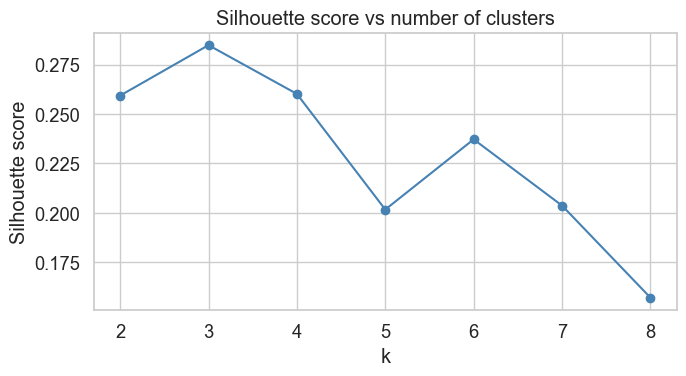

Best k = 3  (silhouette = 0.285)


In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_range = range(2, 9)
sil_scores = []

for k in k_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(7, 4))
plt.plot(list(k_range), sil_scores, marker="o", color="steelblue")
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.title("Silhouette score vs number of clusters")
plt.tight_layout()
plt.show()

best_k = list(k_range)[np.argmax(sil_scores)]
print(f"Best k = {best_k}  (silhouette = {max(sil_scores):.3f})")

---
## Exercise 3 – Compare clusters with the true labels

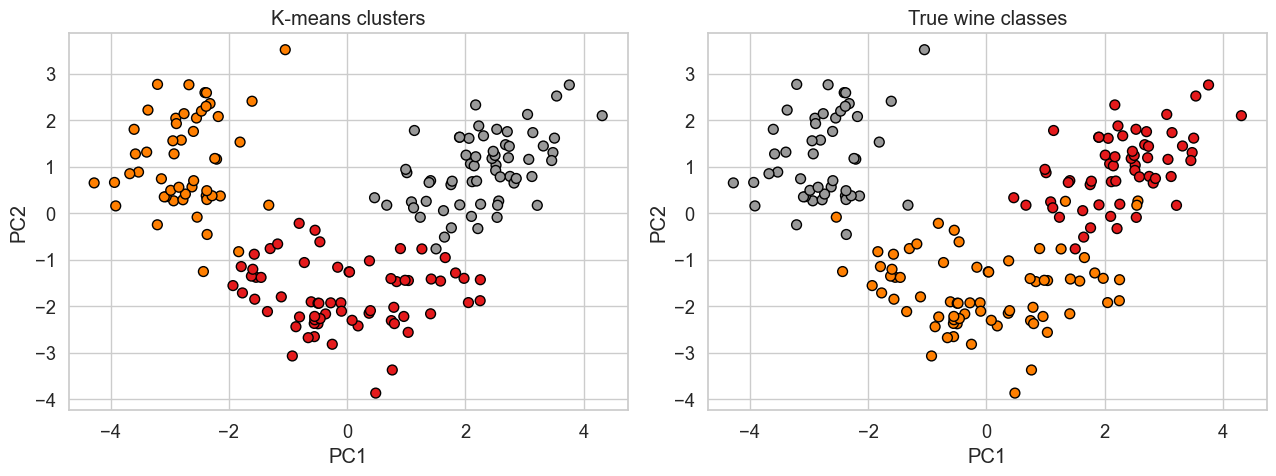

In [4]:
from sklearn.decomposition import PCA

km_best = KMeans(n_clusters=best_k, n_init=10, random_state=42)
cluster_labels = km_best.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.scatter(X_2d[:, 0], X_2d[:, 1], c=cluster_labels, cmap="Set1",
            edgecolor="k", s=50)
ax1.set_title("K-means clusters")
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")

ax2.scatter(X_2d[:, 0], X_2d[:, 1], c=data.target, cmap="Set1",
            edgecolor="k", s=50)
ax2.set_title("True wine classes")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")

plt.tight_layout()
plt.show()

---
## Exercise 4 – Hierarchical clustering

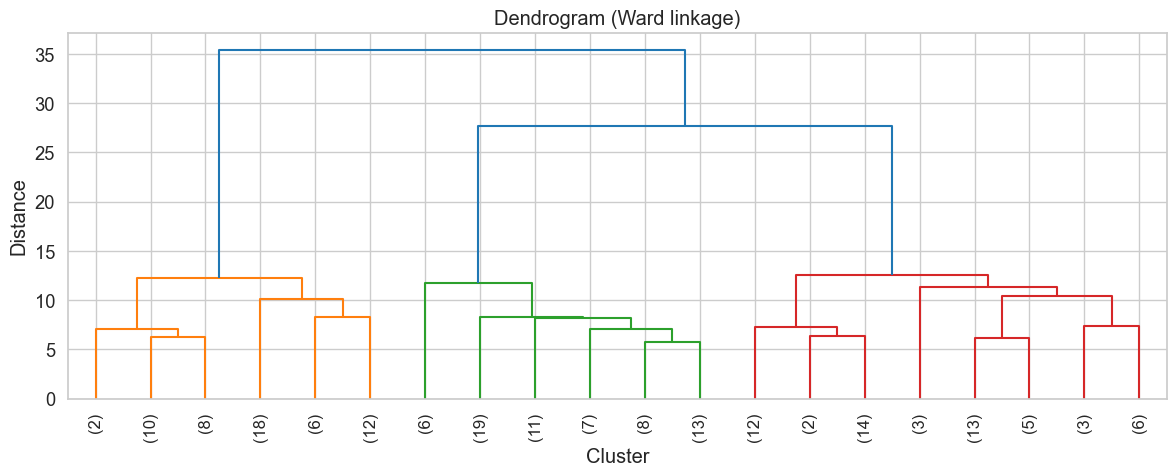

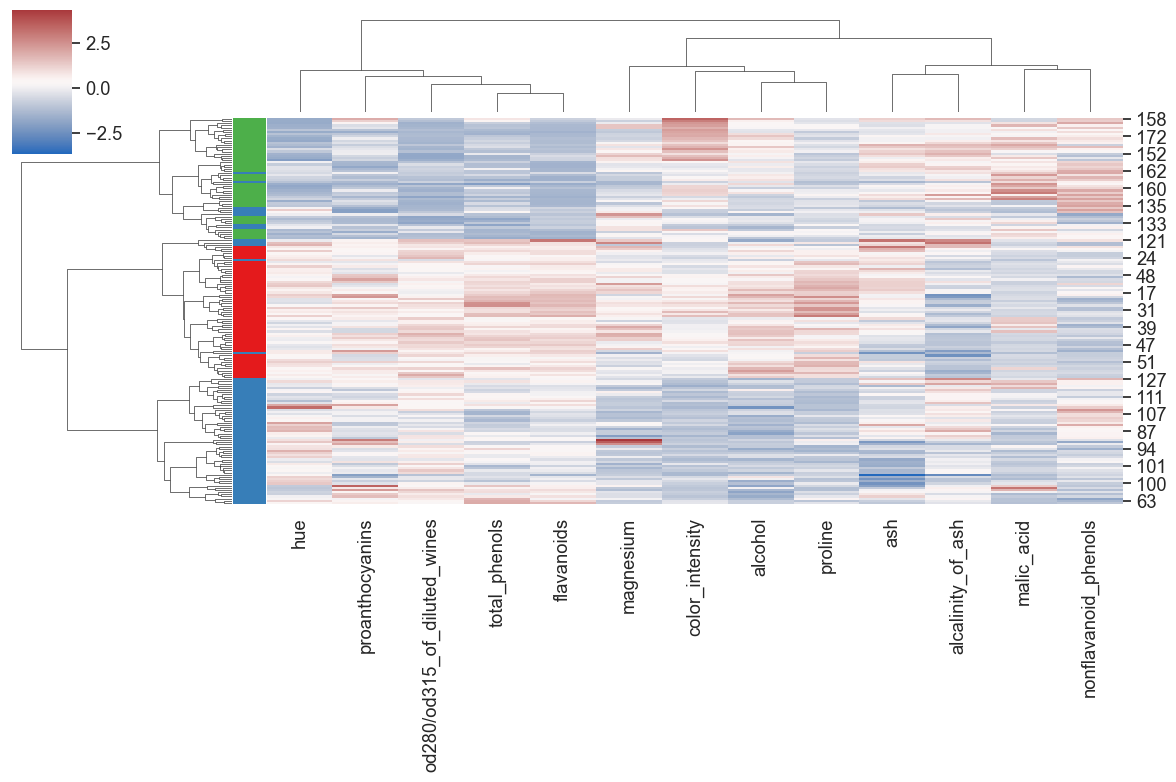

In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 5))
dendrogram(Z, truncate_mode='lastp', p=20, leaf_rotation=90)
plt.title("Dendrogram (Ward linkage)")
plt.xlabel("Cluster")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

# Clustermap
df_scaled = pd.DataFrame(X_scaled, columns=data.feature_names)
row_colors = [sns.color_palette("Set1", 3)[c] for c in data.target]
cg = sns.clustermap(df_scaled, method="ward", row_colors=row_colors,
                    figsize=(12, 8), cmap="vlag")
plt.show()